In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = LinearRegression()

# 2. Setup Pipeline

In [4]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Model_1

In [5]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [6]:
param_grid = {
    "pca__n_components": [45, 100 ,150 ,170],
    "poly__degree":[1,2]
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()),
                                       ('SLR', LinearRegression())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [45, 100, 150, 170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.790):
{'pca__n_components': 100, 'poly__degree': 1}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.213728,0.045096,0.008154,0.007049,100,1,"{'pca__n_components': 100, 'poly__degree': 1}",-0.744067,-0.735256,-9.093440e-01,-0.822809,-9.260865e-01,-7.057071e-01,-0.674851,-7.663712e-01,-0.811880,-8.013942e-01,-7.897766e-01,7.776686e-02,1
0,0.109721,0.016807,0.010170,0.007024,45,1,"{'pca__n_components': 45, 'poly__degree': 1}",-0.781602,-0.774553,-9.785333e-01,-0.837723,-1.022301e+00,-6.838445e-01,-0.717325,-8.666531e-01,-0.844164,-9.838529e-01,-8.490552e-01,1.096172e-01,2
7,13.330220,2.263064,0.131253,0.048509,170,2,"{'pca__n_components': 170, 'poly__degree': 2}",-0.676217,-0.658530,-2.275541e+00,-0.747069,-9.197885e-01,-6.985074e-01,-0.631887,-6.834858e-01,-0.856160,-7.963276e-01,-8.943514e-01,4.686142e-01,3
5,14.005080,0.610762,0.220587,0.020266,150,2,"{'pca__n_components': 150, 'poly__degree': 2}",-0.715163,-0.702420,-2.037452e+00,-0.792788,-9.549297e-01,-7.462227e-01,-0.662295,-7.040480e-01,-0.845197,-8.408445e-01,-9.001360e-01,3.881447e-01,4
3,10.545389,0.471139,0.171833,0.026374,100,2,"{'pca__n_components': 100, 'poly__degree': 2}",-0.901682,-0.874440,-1.014180e+00,-1.000140,-1.163202e+00,-8.726224e-01,-0.835499,-9.040206e-01,-1.001541,-1.026415e+00,-9.593742e-01,9.431910e-02,5
1,8.109320,0.145431,0.143906,0.027321,45,2,"{'pca__n_components': 45, 'poly__degree': 2}",-1.255271,-1.250163,-1.250673e+00,-1.419536,-1.420146e+00,-1.012368e+00,-1.235013,-1.215576e+00,-1.245629,-1.327718e+00,-1.263209e+00,1.095050e-01,6
4,0.161563,0.032196,0.010919,0.009390,150,1,"{'pca__n_components': 150, 'poly__degree': 1}",-0.512133,-0.569253,-2.564365e+25,-0.633127,-7.563299e+24,-2.796497e+24,-0.581328,-1.890418e+25,-0.670868,-1.070161e+25,-6.560923e+24,8.741028e+24,7
6,0.158294,0.027537,0.016096,0.010285,170,1,"{'pca__n_components': 170, 'poly__degree': 1}",-0.508346,-0.564813,-8.601736e+26,-0.611982,-4.182862e+25,-6.613890e+26,-0.593203,-1.502600e+26,-0.670370,-7.206934e+26,-2.434345e+26,3.359252e+26,8


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'pca__n_components': 100, 'poly__degree': 1}


# 5. Evaluate Model $log(Sales)$

In [90]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']


In [91]:
Model_2 = LinearRegression()

In [92]:
poly1 = PolynomialFeatures(degree=best_degree)

In [93]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [94]:
pca1 = PCA(n_components=best_pca)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

LinearRegression()

In [95]:
pca2 = PCA(n_components=best_pca)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [96]:
MSE(SLR1.predict(PX_test1),Y_test1)

2.142009637504929

In [97]:
result = pd.DataFrame(np.exp(Y_test1))

In [98]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [99]:
MSE(result["sales"],result["Predicted_sales"])

1307.084650074992

# 5.1 Model using original sales data

In [100]:
Model_3 = LinearRegression()

In [101]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [102]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [103]:
pca3 = PCA(n_components=best_pca)
X_train2 = poly1.fit_transform(X_train2)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

LinearRegression()

In [104]:
pca4 = PCA(n_components=best_pca)
X_test2=poly1.fit_transform(X_test2)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [105]:
MSE(SLR2.predict(PX_test2),Y_test2)

1903.3625195320458

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [106]:
residual = result['sales']-result['Predicted_sales']

In [107]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [108]:
import scipy.stats as sct

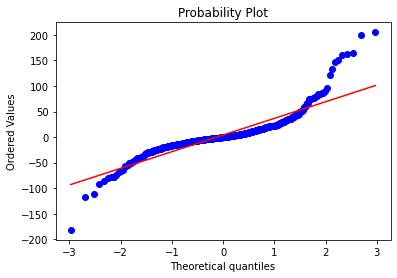

In [109]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [110]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

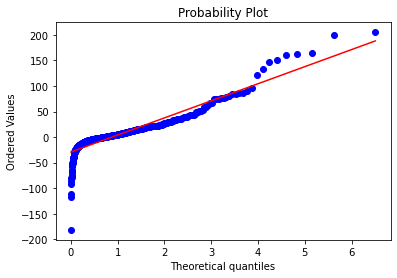

In [111]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [112]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

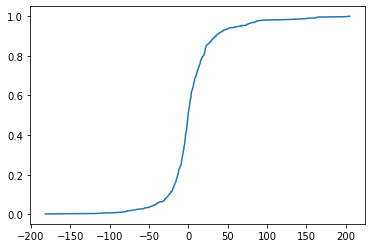

In [113]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

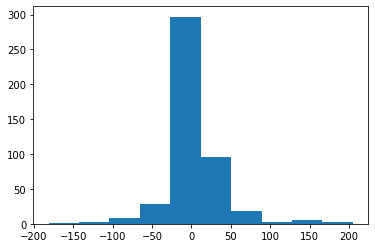

In [114]:
plt.hist(Sample)
plt.show()

In [115]:
def inv(sample,jump,area):
    size = len(sample)
    temp=0
    i=0
    while temp<area:
        temp=jump[i]
        i+=1
    return sample[i]

In [116]:
offset = inv(Sample,jumps,2/3)
offset

7.2507976348008425

In [117]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [118]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [119]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [120]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

19816.000000000004

In [121]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

19756.0

In [122]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

22608.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [123]:
Model_4=LinearRegression()

In [124]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    X_train_K = poly1.fit_transform(X_train_K)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    X_test_K=poly1.fit_transform(X_test_K)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(SLR_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [125]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.119853,0.214601,-0.124158,0.173820,0.087107,0.156525,-0.012988,0.211448,0.238636,0.013734,0.107858
Exponential,0.095979,0.194449,-0.195784,0.147468,0.070508,0.128560,-0.052524,0.167303,0.213672,0.007395,0.077703
Empirical,0.148560,0.244741,-0.112753,0.192704,0.112409,0.196783,0.013478,0.224371,0.254921,0.059739,0.133495


In [126]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,4960.0,9712.0,-5748.0,8100.0,4324.0,6112.0,-636.0,9752.0,10668.0,572.0,4781.6,5046.087498
Exponential,3972.0,8800.0,-9064.0,6872.0,3500.0,5020.0,-2572.0,7716.0,9552.0,308.0,3410.4,5488.413162
Empirical,6148.0,11076.0,-5220.0,8980.0,5580.0,7684.0,660.0,10348.0,11396.0,2488.0,5914.0,5023.608663
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [129]:
profit_table.to_csv(".\\Model_Selection_Result\\2.2_Poly_reg.csv")